In [15]:
from numpy import pi, sin, cos

from prettytable import PrettyTable

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [16]:
a = 0
b = pi

def f(x):
    return sin(x)

def divide_evenly(a, b, len):
    # n-1 bc: | 1 | 2 | 3 | - we divide on 4 points with 3 steps
    step = (b-a)/(len-1)
    return [a+i*step for i in range(len)] 

n = int(input('N'))
print(f'a: {a}\nb: {b}\nN: {n}')

a: 0
b: 3.141592653589793
N: 100


In [17]:
x_list = divide_evenly(a, b, n)
x_list

[0.0,
 0.03173325912716963,
 0.06346651825433926,
 0.0951997773815089,
 0.12693303650867852,
 0.15866629563584814,
 0.1903995547630178,
 0.2221328138901874,
 0.25386607301735703,
 0.28559933214452665,
 0.3173325912716963,
 0.3490658503988659,
 0.3807991095260356,
 0.4125323686532052,
 0.4442656277803748,
 0.47599888690754444,
 0.5077321460347141,
 0.5394654051618837,
 0.5711986642890533,
 0.6029319234162229,
 0.6346651825433925,
 0.6663984416705622,
 0.6981317007977318,
 0.7298649599249014,
 0.7615982190520711,
 0.7933314781792408,
 0.8250647373064104,
 0.85679799643358,
 0.8885312555607496,
 0.9202645146879193,
 0.9519977738150889,
 0.9837310329422585,
 1.0154642920694281,
 1.0471975511965979,
 1.0789308103237674,
 1.110664069450937,
 1.1423973285781066,
 1.1741305877052763,
 1.2058638468324459,
 1.2375971059596156,
 1.269330365086785,
 1.3010636242139548,
 1.3327968833411243,
 1.364530142468294,
 1.3962634015954636,
 1.4279966607226333,
 1.4597299198498028,
 1.4914631789769726,
 1.52

In [18]:
y_list = [f(x) for x in x_list]
y_list

[0.0,
 0.03172793349806765,
 0.0634239196565645,
 0.09505604330418267,
 0.12659245357374926,
 0.1580013959733499,
 0.18925124436041021,
 0.22031053278654064,
 0.2511479871810792,
 0.28173255684142967,
 0.3120334456984871,
 0.3420201433256687,
 0.3716624556603276,
 0.4009305354066137,
 0.42979491208917164,
 0.4582265217274104,
 0.4861967361004687,
 0.5136773915734063,
 0.5406408174555976,
 0.5670598638627707,
 0.5929079290546404,
 0.6181589862206052,
 0.6427876096865393,
 0.6667690005162916,
 0.690079011482112,
 0.7126941713788629,
 0.7345917086575333,
 0.7557495743542583,
 0.7761464642917568,
 0.7957618405308321,
 0.8145759520503357,
 0.8325698546347714,
 0.8497254299495144,
 0.8660254037844387,
 0.8814533634475821,
 0.8959937742913359,
 0.9096319953545183,
 0.9223542941045815,
 0.9341478602651067,
 0.9450008187146685,
 0.9549022414440739,
 0.963842158559942,
 0.9718115683235417,
 0.9788024462147787,
 0.984807753012208,
 0.9898214418809327,
 0.9938384644612541,
 0.9968547759519424,
 0.

In [19]:
# Интеграл методом прямоугольников (левых)
def integral_rectangle_left(x_vals, f):
    h = x_vals[1] - x_vals[0]
    res = sum([f(x) * h for x in x_vals[:-1]])
    return res

int_l = integral_rectangle_left(x_list, f)
int_l

1.9998321638939918

In [20]:
# Интеграл методом прямоугольников (правых)
def integral_rectangle_right(x_vals, f):
    h = x_vals[1] - x_vals[0]
    res = sum([f(x) * h for x in x_vals[1:]])
    return res

int_r = integral_rectangle_right(x_list, f)
int_r

1.9998321638939918

In [21]:
# Интеграл методом прямоугольников (центральных)
def integral_rectangle_central(x_vals, f):
    h = x_vals[1] - x_vals[0]
    hh = h/2 # half h
    res = sum([f(x+hh) * h for x in x_vals[:-1]])
    return res

int_c = integral_rectangle_central(x_list, f)
int_c

2.0000839191093363

In [22]:
# Интеграл методом трапеции
def integral_trapezoidal(x_vals, f):
    y_vals = [f(x) for x in x_vals]
    h = x_vals[1] - x_vals[0]
    hh = h/2 # half h
    res = sum([hh*(y_vals[i] + y_vals[i+1]) for i in range(len(y_vals)-1)])
    return res

int_t = integral_trapezoidal(x_list, f)
int_t

1.9998321638939935

In [23]:
# Интеграл методом Симпсона
def integral_simpson(x_vals, f):
    h = x_vals[1] - x_vals[0]
    assert len(x_vals) % 2 == 0, "n must be even"
    res = h/3 * sum([f(x_vals[i]) * (
      1 if (i == 0 or i == (len(x_vals) - 1)) else 
      4 if i % 2 == 1 else 
      2
    ) for i in range(len(x_vals))])
    return res

int_s = integral_simpson(x_list, f)
int_s

1.9998321638939922

n =  100
int_l =  1.9998321638939918 err =  0.0001678361060082345
int_r =  1.9998321638939918 err =  0.0001678361060082345
int_c =  2.0000839191093363 err =  8.391910933625013e-05
int_t =  1.9998321638939935 err =  0.00016783610600645815
int_s =  1.9998321638939922 err =  0.00016783610600779042
integral_0^π (sin^2(x cos(2 x)))/(5 + x^2)^2 dx = 0.0206178


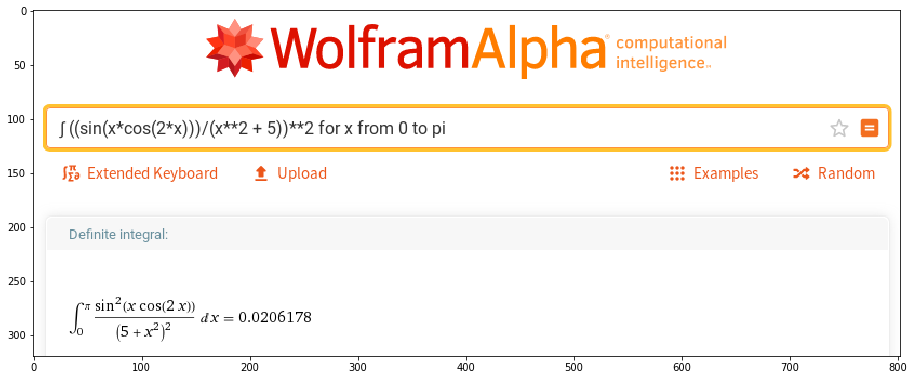

In [24]:
def err(val):
  return abs(val-2)

print('n = ', n)
print('int_l = ', int_l, 'err = ', err(int_l))
print('int_r = ', int_r, 'err = ', err(int_r))
print('int_c = ', int_c, 'err = ', err(int_c))
print('int_t = ', int_t, 'err = ', err(int_t))
print('int_s = ', int_s, 'err = ', err(int_s))
print('integral_0^π (sin^2(x cos(2 x)))/(5 + x^2)^2 dx = 0.0206178')

fig = plt.figure(figsize=(18,6))
axes= fig.add_axes([0.1,0.1,0.8,0.8])
img=mpimg.imread('img/wolf_int.png')
plt.imshow(img)
plt.show()

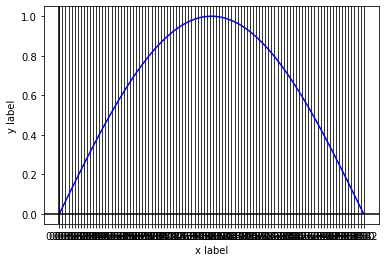

In [25]:
plt.plot(x_list, y_list, color='b')
plt.xlabel('x label')
plt.ylabel('y label')
plt.xticks(x_list)
plt.grid(which='both', axis='x', color='black')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()